## DB에서 데이터 불러오기

In [9]:
import numpy as np
import pandas as pd
import cx_Oracle

In [10]:
def get_data_from_db(query):
    conn = cx_Oracle.connect('hoseo', 'hoseo', 'localhost:1521/xe')
    df = pd.read_sql(query, conn)
    conn.close()
    return df

In [11]:
query = """
    SELECT *
    FROM APT_DEAL_PRICE
    WHERE APT_size < 80
    """

In [12]:
dataD = get_data_from_db(query)
dataD.info()
dataD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440205 entries, 0 to 2440204
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   APT_ID           int64         
 1   REGION           object        
 2   REGION_SUB       object        
 3   APT_NAME         object        
 4   APT_SIZE         float64       
 5   APT_FLOOR        int64         
 6   CONTRACT_DATE    datetime64[ns]
 7   CONTRACT_PRICE   int64         
 8   COMPLETION_YEAR  int64         
 9   STREET_NUM       object        
 10  STREET_NAME      object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 204.8+ MB


,APT_ID,REGION,REGION_SUB,APT_NAME,APT_SIZE,APT_FLOOR,CONTRACT_DATE,CONTRACT_PRICE,COMPLETION_YEAR,STREET_NUM,STREET_NAME
0,2,강원도,강릉시 견소동,송정한신,59.80,15,2012-08-27,85000000,1997,202,경강로2539번길 8
1,3,강원도,강릉시 견소동,송정한신,59.80,1,2012-08-31,60000000,1997,202,경강로2539번길 8
2,13,강원도,강릉시 교동,교동1주공,49.85,13,2012-08-02,90000000,1999,1750,가작로 78
3,15,강원도,강릉시 교동,교동대림,59.84,17,2012-08-08,86000000,1997,18-16,수리골길17번길 21
4,21,강원도,강릉시 교동,민락,54.81,2,2012-08-27,55000000,1985,1429-1,하슬라로10번길 7


In [5]:
# dataD.describe()

In [6]:
c_date = dataD['CONTRACT_DATE']

c_date

0         2012-08-27
1         2012-08-31
2         2012-08-02
3         2012-08-08
4         2012-08-27
             ...    
2440200   2020-07-08
2440201   2020-07-08
2440202   2020-07-09
2440203   2020-07-07
2440204   2020-07-27
Name: CONTRACT_DATE, Length: 2440205, dtype: datetime64[ns]

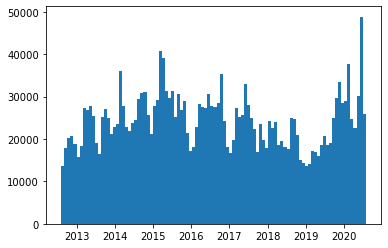

In [8]:
plt.hist(c_date, bins=100) # 히스토그램으로 데이터 분포 보기
plt.show()